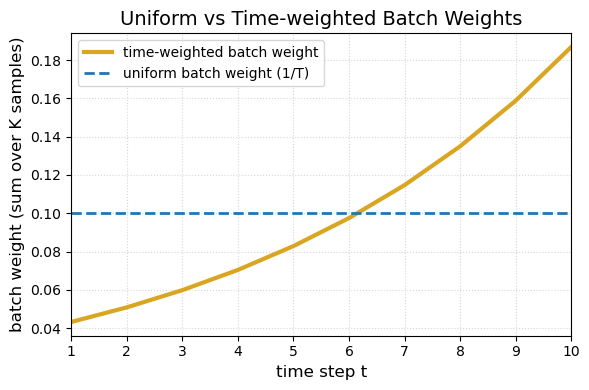

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ---- weight rule from your code ----
def time_weights_from_indices(time_idx, now_t, decay):
    raw = decay ** (now_t - time_idx)
    pi = raw / raw.sum()
    return pi

# ---- your settings ----
T = 10          # time steps
K = 20          # samples per step
decay = 0.85    # geometric decay

# Construct time indices
time_idx = np.repeat(np.arange(T), K)

# Compute actual weights per sample
pi = time_weights_from_indices(time_idx, now_t=T-1, decay=decay)

# Aggregate to batch-level weight (sum over K samples in each time t)
weights_per_t = np.array([pi[time_idx == t].sum() for t in range(T)])

# Uniform batch weight (total batch weight is 1/T)
uniform_batch_weight = np.ones(T) * (1.0 / T)

# ---- Plot ----
plt.figure(figsize=(6, 4))

# Time-weighted batch weights
plt.plot(
    range(1, T+1),
    weights_per_t,
    color="#DAA520",
    linewidth=3,
    label="time-weighted batch weight"
)

# Uniform batch weights
plt.plot(
    range(1, T+1),
    uniform_batch_weight,
    linestyle="--",
    linewidth=2,
    color="#1f77b4",
    label="uniform batch weight (1/T)"
)

plt.xlabel("time step t", fontsize=12)
plt.ylabel("batch weight (sum over K samples)", fontsize=12)
plt.xlim(1, T)
plt.title("Uniform vs Time-weighted Batch Weights", fontsize=14)
plt.grid(True, linestyle=":", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()